In [87]:
import numpy as np
import pandas as pd

#kmeans
from sklearn.cluster import KMeans, MiniBatchKMeans

#plot stuff
import matplotlib.pyplot as mpl

#pca 
from sklearn.decomposition import PCA

#comparing
from sklearn.metrics.pairwise import pairwise_distances_argmin

In [3]:
#load preprocessed mouse data
counts = pd.read_csv("mouseCounts.csv")
print(counts.shape)
counts = counts.values[1:18293,1:]

(18294, 3006)


In [88]:
#run pca for 2 dimensions
pca = PCA(n_components = 2).fit_transform(counts.transpose())

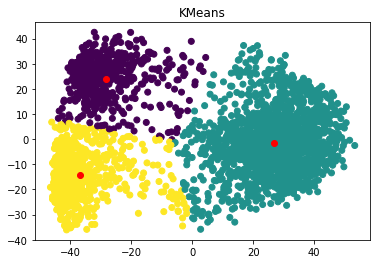

In [91]:
#kmeans on top 5 PCs
kmeans = KMeans(n_clusters = 3, random_state = 0)
kmeans.fit(pca)
color = kmeans.predict(pca)

#plot
mpl.figure(0)
mpl.title("KMeans")
mpl.scatter(pca[:,0], pca[:,1], c = color)
mpl.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], color = 'red')
mpl.show()

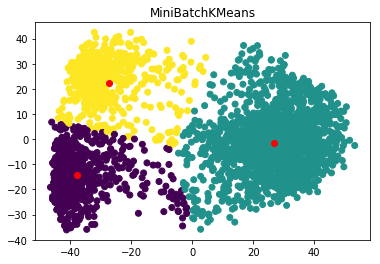

In [92]:
#run minibatchkmeans on pca results
mbk = MiniBatchKMeans(n_clusters = 3, random_state = 0)
mbk.fit(pca)
color = mbk.predict(pca)

#plot
mpl.figure(1)
mpl.title("MiniBatchKMeans")
mpl.scatter(pca[:,0], pca[:,1], c = color)
mpl.scatter(mbk.cluster_centers_[:,0],mbk.cluster_centers_[:,1], c = 'red')
mpl.show()

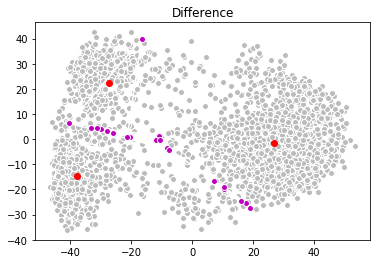

In [108]:
#comparing

#pairing kmeans and mbk clusters
centers = np.sort(kmeans.cluster_centers_)
mcenters = np.sort(mbk.cluster_centers_)

labels = pairwise_distances_argmin(pca, centers)
mlabels =  pairwise_distances_argmin(pca, mcenters)

order = pairwise_distances_argmin(centers, mcenters)

#identify difference
different = (mlabels == 4)


for k in range(3):
    different += ((labels == k) != (mlabels == order[k]))

identic = np.logical_not(different)

#plot
mpl.plot(pca[identic, 0], pca[identic, 1], 'w',
        markerfacecolor='#bbbbbb', marker='o')
mpl.plot(pca[different, 0], pca[different, 1], 'w',
        markerfacecolor='m', marker='o')
mpl.plot(mbk.cluster_centers_[:,0],mbk.cluster_centers_[:,1], 'ro')
mpl.title('Difference')
mpl.show()